## First order reaction 
### See explanation [here](https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Kinetics/Reaction_Rates/First-Order_Reactions)


Text(0.5, 0, 'Time')

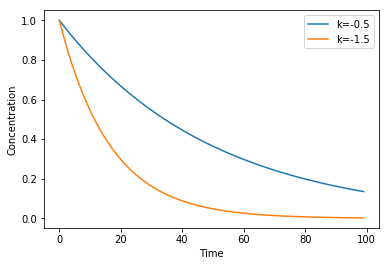

In [42]:
import numpy as np
def A(t=0, C=1, k=1):
    return C*np.exp(k*t)

t = np.linspace(0,4,100)
plt.plot(A(t=t, k=-0.5), label='k=-0.5')
plt.plot(A(t=t, k=-1.5), label='k=-1.5')
plt.legend()
plt.ylabel('Concentration')
plt.xlabel('Time')

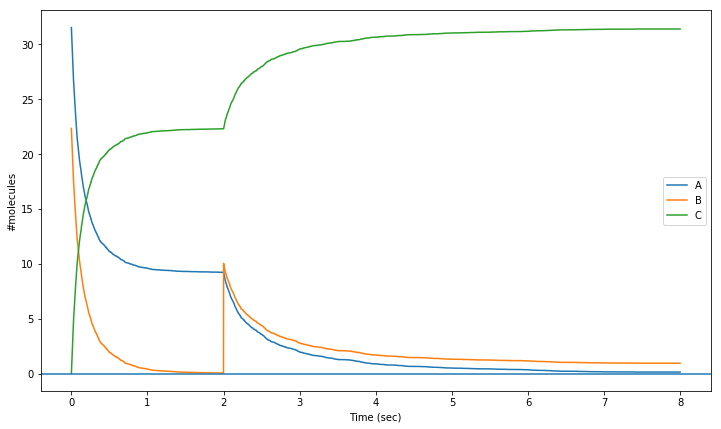

In [23]:
import steps.model as smodel
import steps.geom as swm
import steps.rng as srng
import steps.solver as ssolver
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

# instantiate model:
mdl = smodel.Model()

# instantiate species:
molA = smodel.Spec('molA', mdl)
molB = smodel.Spec('molB', mdl)
molC = smodel.Spec('molC', mdl)

# instantiate a volume system (a VS groups together different reaction and diffusion rules):
vsys = smodel.Volsys('vsys', mdl)

# define reactions
# forward (kon). We assign a reaction to a volume system, define the left and right sides a k const):
kreac_f = smodel.Reac('kreac_f', vsys, lhs=[molA, molB], rhs=[molC], kcst=0.3e6)
"""
???? IN FIRST-ORDER REACTIONS KCST IS THE SAME AS TAU IN ANY DIFFERENTIAL EQUATION.
IT CONTROLS THE DECAY RATE (OR THE RATE WITH WHICH THE NUMBER OF MOLECULES REACT)
"""
# backward (Koff) 
kreac_b = smodel.Reac('kreac_b', vsys, lhs=[molC], rhs=[molA, molB], kcst=0.7)

# define 'hub' compartment:
wmgeom = swm.Geom()
# create a 'comp' compartment (actual geometric entity) in the 'wgeom' entity:
comp = swm.Comp('comp', wmgeom)
# add a volume system to the compartment and set the volume value:
comp.addVolsys('vsys')
comp.setVol(1.6667e-21)

# random number generator, buffer size, seed:
r = srng.create('mt19937', 256)
r.initialize(23412)

# instantiate a solver:
sim = ssolver.Wmdirect(mdl, wmgeom, r)

# reset the solver:
sim.reset()

# set initial conditions:
sim.setCompConc('comp', 'molA', 31.4e-6) # Mohl/liter
sim.setCompConc('comp', 'molB', 22.3e-6)

T = 8
dt = 0.001
NITER = 100

# simulate for NITER times every timestep (to smooth out the jitter):
res = numpy.zeros([NITER, len(tpnt), 3])
time = numpy.arange(0.0, T, dt)
res = numpy.zeros([NITER, len(time), 3])

for i in range(0, NITER):
    sim.reset()
    sim.setCompConc('comp', 'molA', 31.4e-6)
    sim.setCompConc('comp', 'molB', 22.3e-6)

    for t in range(len(time)):
        sim.run(time[t])
#         if t == 1:
#             sim.setCompReacK('comp','kreac_f', 0.1e6)
#             sim.setCompReacK('comp','kreac_b', 100.7)
                
        if time[t] == 2:
            sim.setCompCount('comp', 'molB', sim.getCompCount('comp', 'molB') + 10)
#         if time[t] == 2:
#             sim.setCompReacK('comp','kreac_f', 0.3e6)
#             sim.setCompReacK('comp','kreac_b', 0.7)
        res[i, t, 0] = sim.getCompCount('comp', 'molA')
        res[i, t, 1] = sim.getCompCount('comp', 'molB')
        res[i, t, 2] = sim.getCompCount('comp', 'molC')
res_mean = numpy.mean(res, 0)

plt.figure(figsize=(12,7))
# Plot mean number of molecules of 'molA' over the time range:
plt.plot(time, res_mean[:,0], label = 'A')
# Plot mean number of molecules of 'molB' over the time range:
plt.plot(time, res_mean[:,1], label = 'B')
# Plot mean number of molecules of 'molC' over the time range:
plt.plot(time, res_mean[:,2], label = 'C')

plt.xlabel('Time (sec)')
plt.ylabel('#molecules')
plt.legend()
plt.axhline(0)

## Let's model a decay of one species:

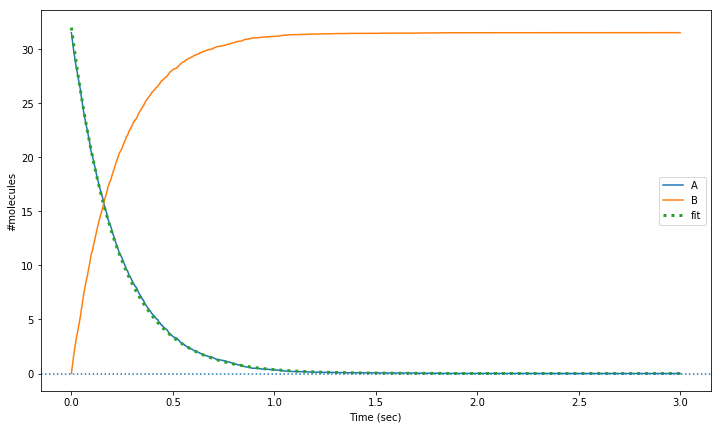

In [64]:
import steps.model as smodel
import steps.geom as swm
import steps.rng as srng
import steps.solver as ssolver
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

# instantiate model:
mdl = smodel.Model()

# instantiate species:
molA = smodel.Spec('molA', mdl)
molB = smodel.Spec('molB', mdl)

# instantiate a volume system (a VS groups together different reaction and diffusion rules):
vsys = smodel.Volsys('vsys', mdl)

# define reactions
reac = smodel.Reac('reac', vsys, lhs=[molA], rhs=[molB], kcst=4.5)

# define 'hub' compartment:
wmgeom = swm.Geom()
# create a 'comp' compartment (actual geometric entity) in the 'wgeom' entity:
comp = swm.Comp('comp', wmgeom)
# add a volume system to the compartment and set the volume value:
comp.addVolsys('vsys')
comp.setVol(1.6667e-21)

# random number generator, buffer size, seed:
r = srng.create('mt19937', 256)
r.initialize(23412)

# instantiate a solver:
sim = ssolver.Wmdirect(mdl, wmgeom, r)

# reset the solver:
sim.reset()

# set initial conditions:
sim.setCompConc('comp', 'molA', 31.4e-6) # Mohl/liter
sim.setCompConc('comp', 'molB', 0)

T = 3
dt = 0.001
NITER = 100

# simulate for NITER times every timestep (to smooth out the jitter):
res = numpy.zeros([NITER, len(time), 3])
time = numpy.arange(0.0, T, dt)
res = numpy.zeros([NITER, len(time), 2])

for i in range(0, NITER):
    sim.reset()
    sim.setCompConc('comp', 'molA', 31.4e-6)
    sim.setCompConc('comp', 'molB', 0)

    for t in range(len(time)):
        sim.run(time[t])
        
        res[i, t, 0] = sim.getCompCount('comp', 'molA')
        res[i, t, 1] = sim.getCompCount('comp', 'molB')
res_mean = numpy.mean(res, 0)

plt.figure(figsize=(12,7))
# Plot mean number of molecules of 'molA' over the time range:
plt.plot(time, res_mean[:,0], label = 'A')
# Plot mean number of molecules of 'molB' over the time range:
plt.plot(time, res_mean[:,1], label = 'B')


plt.xlabel('Time (sec)')
plt.ylabel('#molecules')

A = [32*np.exp(-4.5*t) for t in time]
plt.plot(time, A, linestyle=':', linewidth=3, label='fit')
plt.legend()
plt.axhline(0, linestyle=':')